In [1]:
# Imports
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=87)

# Neural network model with additional dense layers
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))  # Adjusted input_dim for Breast Cancer dataset
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=1)

# Model summary
print(model.summary())

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/100
43/43 [==============================] - 6s 11ms/step - loss: 0.4751 - accuracy: 0.8028
Epoch 2/100
43/43 [==============================] - 0s 11ms/step - loss: 0.1711 - accuracy: 0.9390
Epoch 3/100
43/43 [==============================] - 0s 9ms/step - loss: 0.1050 - accuracy: 0.9531
Epoch 4/100
43/43 [==============================] - 0s 12ms/step - loss: 0.0761 - accuracy: 0.9648
Epoch 5/100
43/43 [==============================] - 1s 18ms/step - loss: 0.0579 - accuracy: 0.9718
Epoch 6/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0494 - accuracy: 0.9765
Epoch 7/100
43/43 [==============================] - 0s 9ms/step - loss: 0.0388 - accuracy: 0.9836
Epoch 8/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.9859
Epoch 9/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9906
Epoch 10/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.9906
Epoc

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 9s 31ms/step - loss: 0.2910 - accuracy: 0.9119 - val_loss: 0.1221 - val_accuracy: 0.9608
Epoch 2/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1002 - accuracy: 0.9693 - val_loss: 0.0896 - val_accuracy: 0.9720
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0624 - accuracy: 0.9801 - val_loss: 0.0672 - val_accuracy: 0.9790
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0809 - val_accuracy: 0.9743
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0814 - val_accuracy: 0.9749
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0636 - val_accuracy: 0.9798
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.

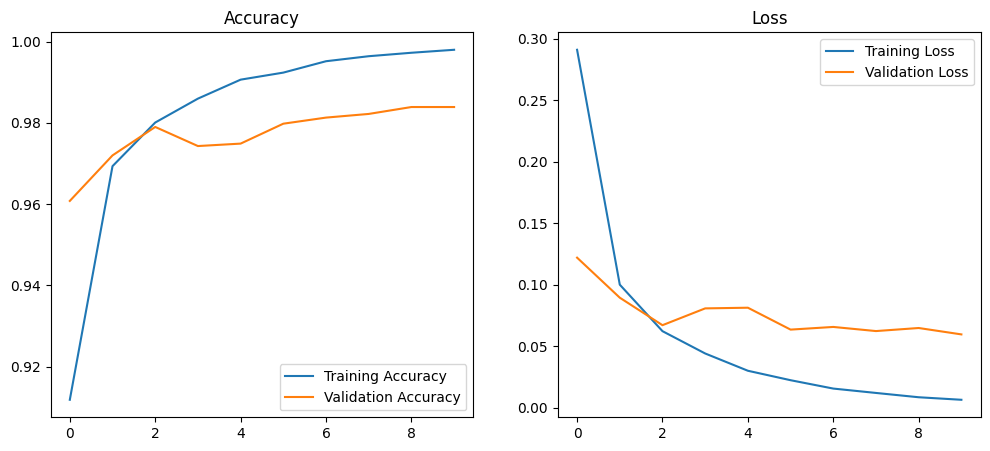

1/1 [==============================] - 0s 92ms/step
Predicted class for image at index 0: 7


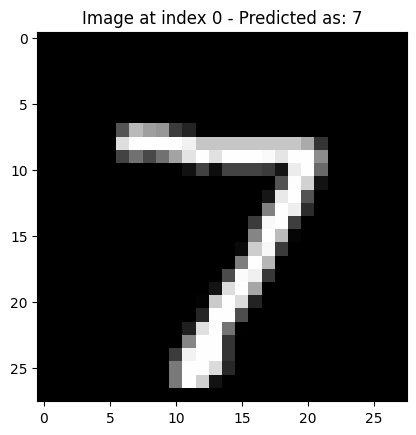

Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 0.3919 - accuracy: 0.8849 - val_loss: 0.2862 - val_accuracy: 0.9152
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2342 - accuracy: 0.9322 - val_loss: 0.1943 - val_accuracy: 0.9430
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1701 - accuracy: 0.9510 - val_loss: 0.1870 - val_accuracy: 0.9457
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1303 - accuracy: 0.9623 - val_loss: 0.1582 - val_accuracy: 0.9502
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1038 - accuracy: 0.9701 - val_loss: 0.1109 - val_accuracy: 0.9660
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0846 - accuracy: 0.9755 - val_loss: 0.1010 - val_accuracy: 0.9690
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0704 - accuracy: 0.9798 - val_loss: 0.0893 - val_accuracy: 0.9739

In [2]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating the network
model = Sequential([
    Dense(512, activation='relu', input_shape=(dimData,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

# Plotting the accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Predicting a single image
def predict_single_image(image_data):
    image_data = image_data.reshape(1, dimData).astype('float32') / 255
    prediction = model.predict(image_data)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Choose an image from the test set
image_index = 0  # Change this to see different predictions
predicted_class = predict_single_image(test_images[image_index])
print(f'Predicted class for image at index {image_index}: {predicted_class}')
plt.imshow(test_images[image_index], cmap='gray')
plt.title(f'Image at index {image_index} - Predicted as: {predicted_class}')
plt.show()

# Modify the model to use different activation functions and fewer layers for comparison
# You can adjust the following model architecture as needed
model_tanh = Sequential([
    Dense(512, activation='tanh', input_shape=(dimData,)),
    Dense(10, activation='softmax')
])

model_tanh.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_tanh.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
               validation_data=(test_data, test_labels_one_hot))

# To compare performance without scaling, you would need to adjust the data preprocessing
# and re-train the model. This is not included here for brevity but can be done by removing
# the division by 255 in the data preprocessing steps.